<h1>Construção de um classificador de análise de crédito bancário utilizando o classificador Ingênuo de Bayes em linguagem Python</h1>



In [421]:
# Importação das bibliotecas utilizadas
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from yellowbrick.classifier import ConfusionMatrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [270]:
# Carregamento da base de dados e definição dos previsores (variáveis independentes - X) e a classe (variável target - y)
credito = pd.read_csv('Credit.csv')
credito.shape

(1000, 21)

In [60]:
# Carregando os 10 primeiros valores do dataset
credito.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings',1<=X<4,2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,500<=X<1000,>=7,3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,'existing paid','used car',6948,<100,1<=X<4,2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,>=1000,4<=X<7,2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,0<=X<200,30,'critical/other existing credit','new car',5234,<100,unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


In [216]:
# Análise descritiva dos dados numéricos
credito.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


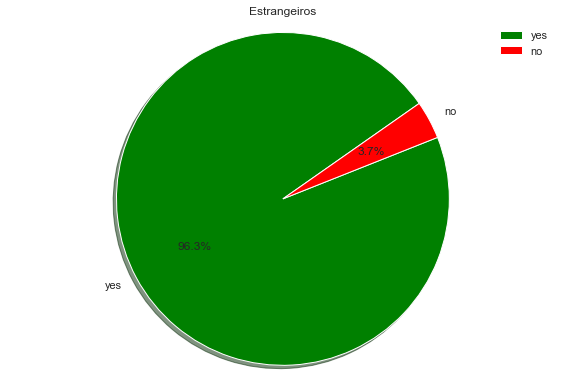

In [420]:
votos = np.array([963, 37])
candi = ['yes', 'no']

cores=['green', 'red', 'blue', 'magenta', 'green','lightskyblue', 'yellowgreen']
explode = (0.1, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Atribuindo um título ao gráfico
plt.title('Estrangeiros')

plt.pie(votos, labels=candi, colors=cores, autopct='%1.1f%%', shadow=True, startangle= 35)

#Adiciona Legenda
plt.legend(candi, bbox_to_anchor=(1.0, 1.0))

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()

plt.show()


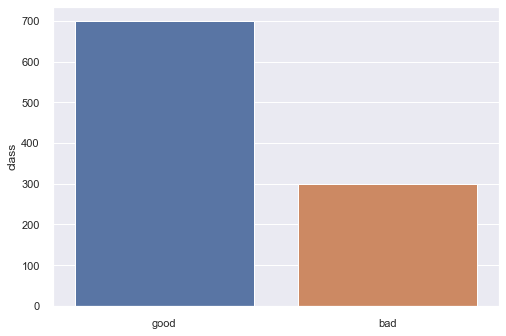

In [223]:
#Distribuição das classes target
credito.groupby("class").size()
sn.set(style='darkgrid')
classe = credito['class'].unique()
classe2 = credito['class'].value_counts()
sn.barplot(x=classe, y=classe2)

In [69]:
correlacao = credito.corr(method = 'pearson')

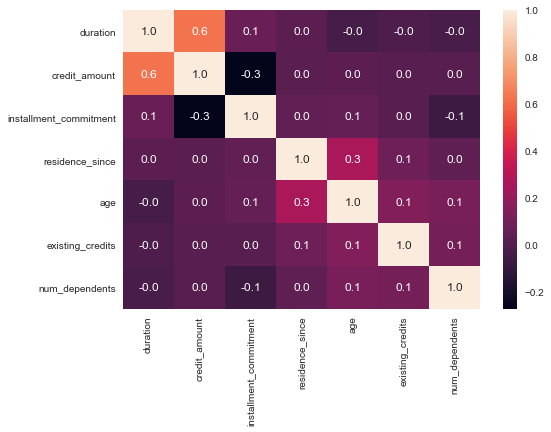

In [70]:
# Matriz de correlação entre as variavéis numéricas preditoras
plot_matriz_cor = sn.heatmap(correlacao, annot = True, fmt=".1f")
plot_matriz_cor

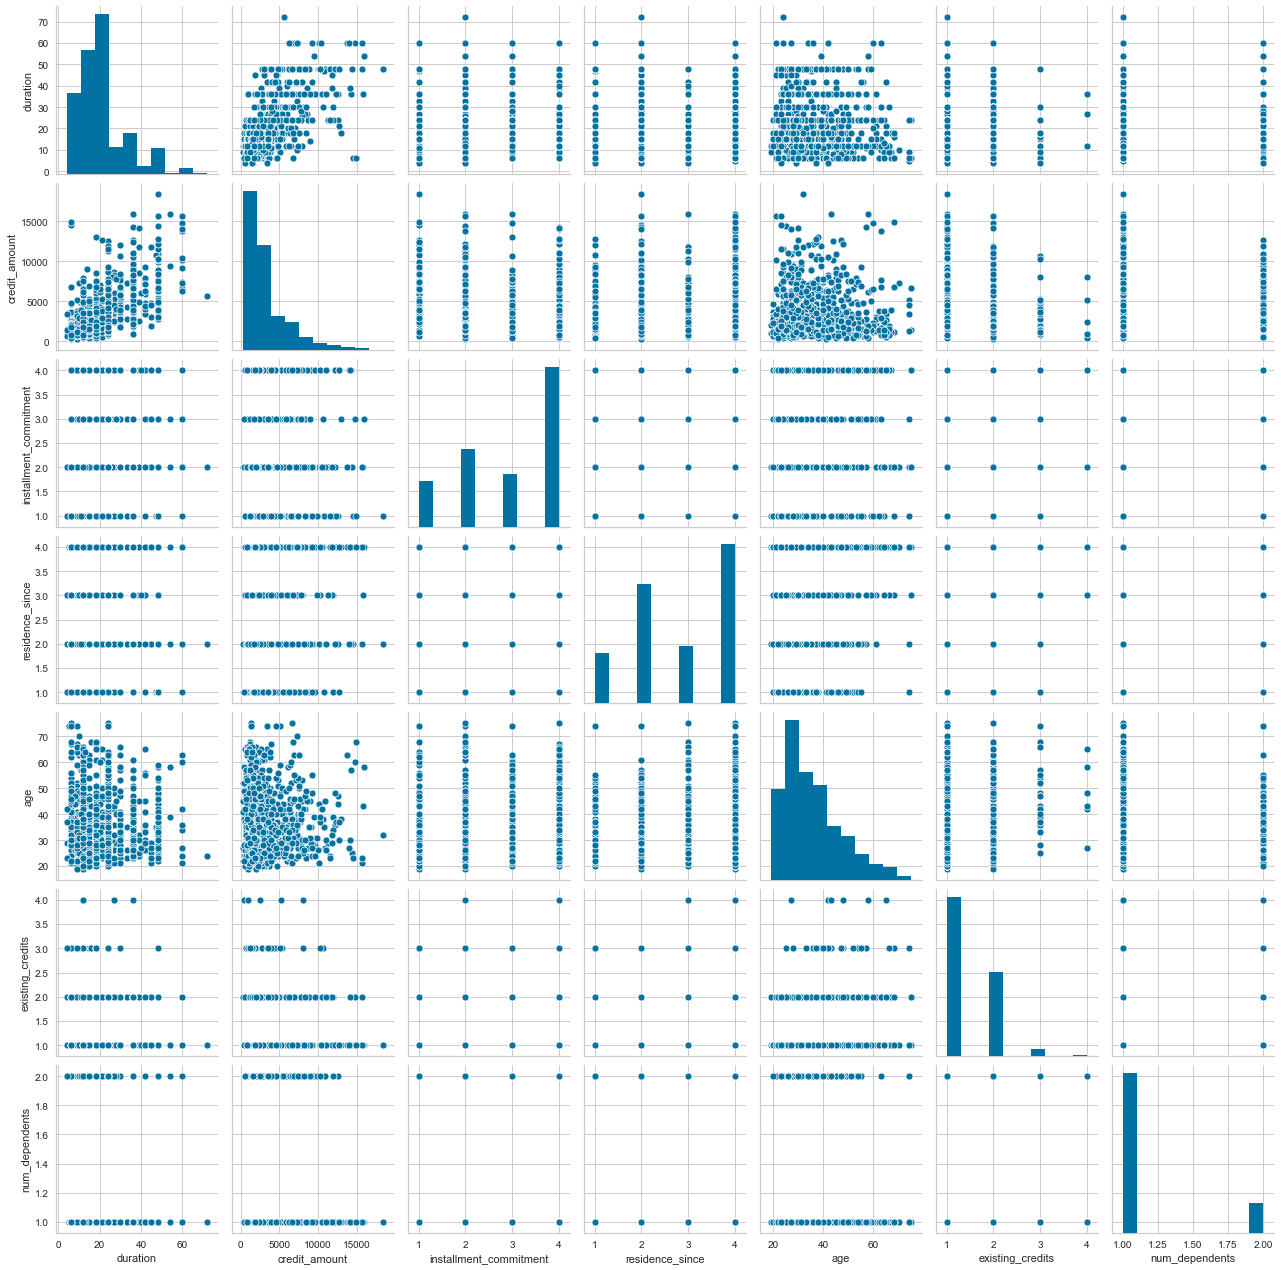

In [71]:
# Distribuições das variavéis numéricas
sn.pairplot(credito)

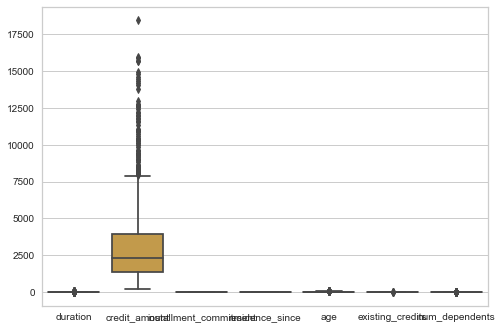

In [72]:
sn.boxplot(data = credito, orient = "v")

In [44]:
#Check de valores nulos
credito.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [238]:
# Formato de matriz
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

In [239]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
# Precisamos criar um objeto para cada atributo categórico, pois na sequência vamos executar o processo de encoding novamente para o registro de teste
# Se forem utilizados objetos diferentes, o número atribuído a cada valor poderá ser diferente, o que deixará o teste inconsistente
labelencoder1 = LabelEncoder()
previsores[:,0] = labelencoder1.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores[:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores[:, 3] = labelencoder3.fit_transform(previsores[:, 3])

labelencoder4 = LabelEncoder()
previsores[:, 5] = labelencoder4.fit_transform(previsores[:, 5])

labelencoder5 = LabelEncoder()
previsores[:, 6] = labelencoder5.fit_transform(previsores[:, 6])

labelencoder6 = LabelEncoder()
previsores[:, 8] = labelencoder6.fit_transform(previsores[:, 8])

labelencoder7 = LabelEncoder()
previsores[:, 9] = labelencoder7.fit_transform(previsores[:, 9])

labelencoder8 = LabelEncoder()
previsores[:, 11] = labelencoder8.fit_transform(previsores[:, 11])

labelencoder9 = LabelEncoder()
previsores[:, 13] = labelencoder9.fit_transform(previsores[:, 13])

labelencoder10 = LabelEncoder()
previsores[:, 14] = labelencoder10.fit_transform(previsores[:, 14])

labelencoder11 = LabelEncoder()
previsores[:, 16] = labelencoder11.fit_transform(previsores[:, 16])

labelencoder12 = LabelEncoder()
previsores[:, 18] = labelencoder12.fit_transform(previsores[:, 18])

labelencoder13 = LabelEncoder()
previsores[:, 19] = labelencoder13.fit_transform(previsores[:, 19])



In [248]:
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [249]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_teste

array([[2, 36, 3, ..., 1, 1, 1],
       [0, 9, 3, ..., 2, 0, 0],
       [0, 18, 3, ..., 1, 1, 1],
       ...,
       [0, 24, 1, ..., 1, 0, 1],
       [1, 27, 4, ..., 1, 1, 1],
       [1, 12, 3, ..., 1, 0, 1]], dtype=object)

In [341]:
# Previsões utilizando os registros de teste
previsoes = naive_bayes.predict(X_teste)
previsoes

array(['bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good', 'good',
       'good', 'bad', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'bad', 'bad', 'good',
       'bad', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
      

In [251]:
#geração da matriz de confusão e cálculo da taxa de acerto e erro
confusao = confusion_matrix(y_teste, previsoes)
confusao

array([[ 41,  45],
       [ 42, 172]], dtype=int64)

In [252]:
# Acurácia do modelo (71%)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

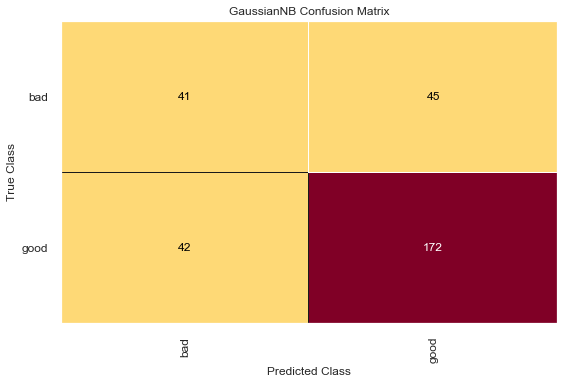

In [377]:
# Matriz de Confusão
v = ConfusionMatrix(GaussianNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [224]:
# Aplicando o modelo GaussNB
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB(priors=None, var_smoothing=1e-09)

In [386]:
#Validação cruzada K-Fold com k=10
kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
result = cross_val_score(naive_bayes.fit(X_treinamento, y_treinamento), X_teste, y_teste, cv = kfold)
result

array([0.63333333, 0.6       , 0.7       , 0.7       , 0.86666667,
       0.8       , 0.8       , 0.66666667, 0.66666667, 0.7       ])

In [387]:
result.mean()

0.7133333333333335

In [394]:
# Classificador Bernoulli
>>> clf = BernoulliNB()
>>> clf.fit(X_treinamento, y_treinamento)
BernoulliNB(alpha=1.0, binarize=0.0, fit_prior=True)
clf.predict(X_teste)

array(['good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'go

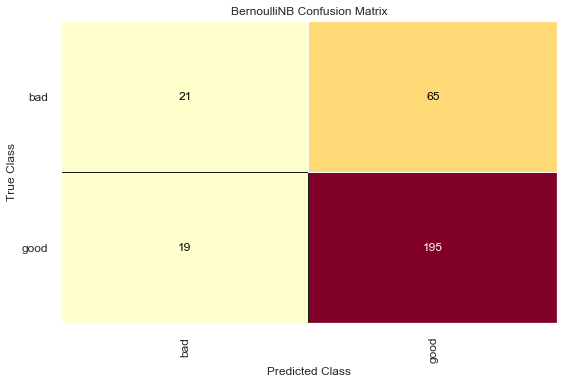

In [422]:
# Matriz de Confusão
v = ConfusionMatrix(BernoulliNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [396]:
# Acurácia do modelo (72%)
taxa_acerto = accuracy_score(y_teste, clf.predict(X_teste))
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.72

In [411]:
kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
result = cross_val_score(clf.fit(X_treinamento, y_treinamento), X_teste, y_teste, cv = kfold)
result

array([0.7       , 0.76666667, 0.73333333, 0.5       , 0.63333333,
       0.76666667, 0.8       , 0.73333333, 0.7       , 0.73333333])

In [412]:
result.mean()

0.7066666666666667

In [424]:
clf2 = MultinomialNB()
clf2.fit(X_treinamento, y_treinamento)
MultinomialNB
clf2.predict(X_teste)

array(['bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'bad', 'good', 'bad', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'bad', 'bad',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad',
       'bad', 'bad', 'good', 'bad', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'good', 'good',
       'bad', 'bad', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'bad',


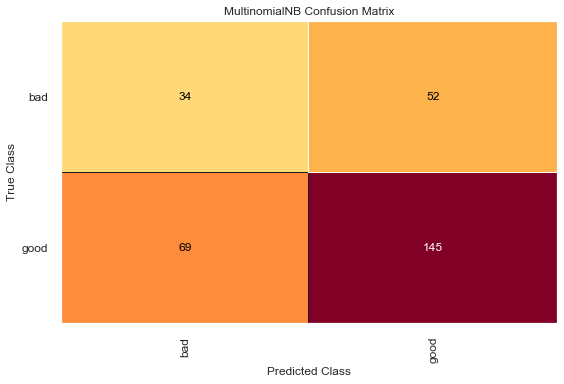

In [425]:
v = ConfusionMatrix(MultinomialNB())
v.fit(X_treinamento, y_treinamento)
v.score(X_teste, y_teste)
v.poof()

In [426]:
# Acurácia do modelo (59,67%)
taxa_acerto = accuracy_score(y_teste, clf.predict(X_teste))
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.72

In [415]:
kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.
result2 = cross_val_score(clf2.fit(X_treinamento, y_treinamento), X_teste, y_teste, cv = kfold)
result2

array([0.7       , 0.66666667, 0.63333333, 0.43333333, 0.56666667,
       0.56666667, 0.76666667, 0.56666667, 0.56666667, 0.53333333])

In [416]:
result2.mean()

0.6